In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
X,y =make_blobs(n_samples=100, centers=4,n_features=2, cluster_std=[1,1.5,2,2], random_state=7)

In [3]:
X.shape

(100, 2)

In [4]:
X

array([[ -3.38426057,   5.22173974],
       [ -1.83623836,  -7.73538367],
       [ -7.45617621,   6.19887436],
       [ -1.78504307,   1.60974874],
       [-10.1249098 ,   6.1338052 ],
       [  1.0146433 ,   4.0453507 ],
       [ -0.70092735,  -6.98196818],
       [  8.99757441,  -2.30228718],
       [ -7.9192539 ,   5.72225675],
       [  1.9445622 ,  -7.43742299],
       [ -0.93442649,  -7.78820426],
       [ 11.48819121,   1.33719026],
       [ -2.86067816, -11.24623446],
       [ -7.90577233,   4.84553865],
       [ -2.24228315,   4.38550238],
       [  0.56928691, -10.0571088 ],
       [  0.6237701 ,  -6.12033956],
       [  8.32594634,   0.04535295],
       [ -2.11937574, -10.1833945 ],
       [ -6.70767333,   5.26896209],
       [ -2.52855036,   5.03085908],
       [ -8.19937429,   4.07185131],
       [ -8.86097416,   7.62744807],
       [  0.25552915, -12.26658908],
       [  7.09274235,   1.13571881],
       [ -8.51922024,   4.14769715],
       [  9.58876813,  -2.81738008],
 

In [5]:
y

array([1, 3, 0, 1, 0, 1, 3, 2, 0, 3, 3, 2, 3, 0, 1, 3, 3, 2, 3, 0, 1, 0,
       0, 3, 2, 0, 2, 2, 3, 1, 3, 3, 1, 3, 3, 0, 2, 0, 1, 0, 3, 1, 1, 2,
       1, 2, 0, 0, 2, 0, 2, 3, 2, 3, 1, 0, 1, 3, 1, 1, 1, 3, 1, 2, 0, 2,
       0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 3, 1, 1, 1, 0, 3, 2, 3, 2, 0,
       0, 1, 3, 1, 0, 3, 2, 2, 3, 1, 0, 1])

In [6]:
df_blobs = pd.DataFrame({
    'x1': X[:,0],
    'x2': X[:,1],
     'y':y,
})

df_blobs

,x1,x2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


In [7]:
def plot_2d_clusters(x,y,ax):
    y_uniques = pd.Series(y).unique()

    for _ in y_uniques:
        x[y==_].plot(
            title=f'{len(y_uniques)} Clusters',
            kind = 'scatter',
            x = 'x1',
            y='x2',
            marker = f'${_}$',
            ax = ax
        )

## Graficamos como son los datos originales antes de "entrenarlos" para comparar con el resultado

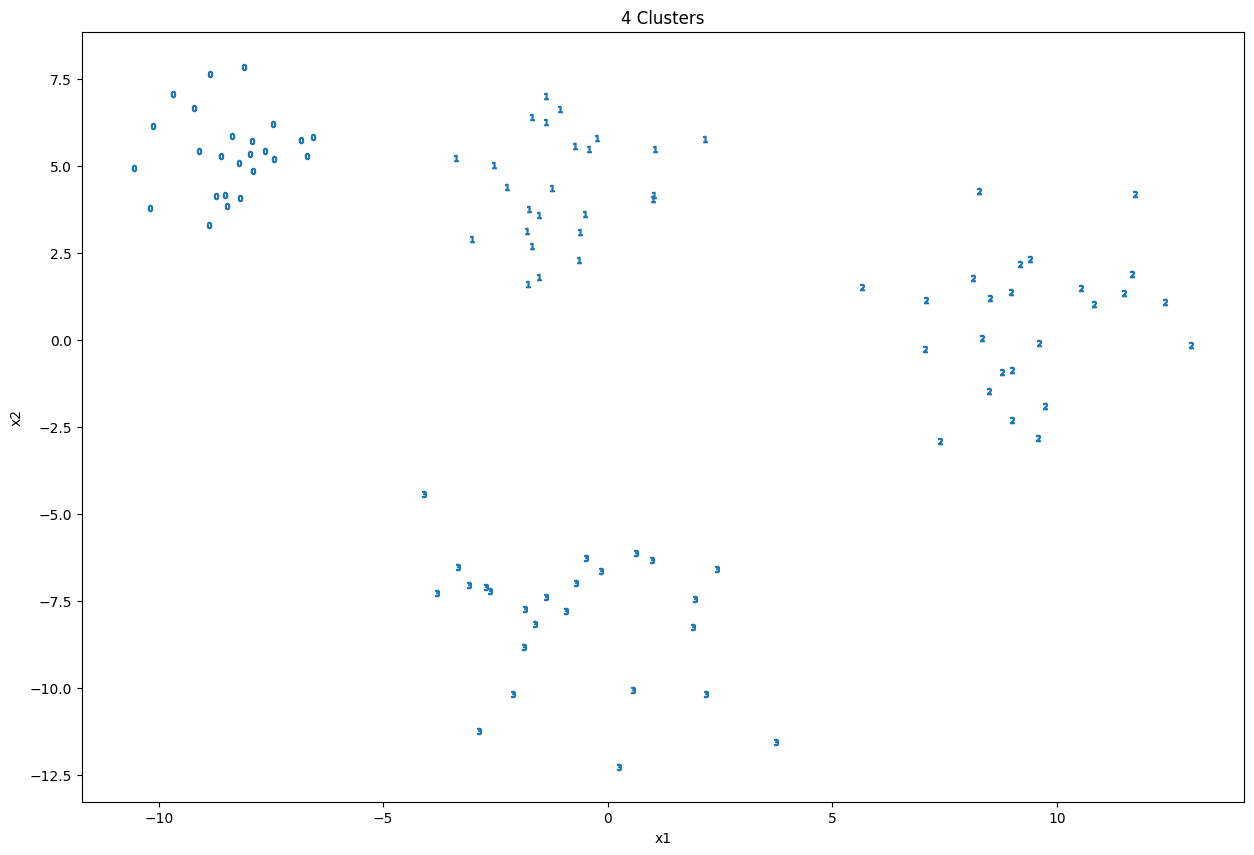

In [8]:
fig, ax = plt.subplots(1,1, figsize=(15,10))
x,y = df_blobs[['x1','x2']],df_blobs['y']
plot_2d_clusters(x,y,ax)


## Ahora si vamos a entrenar 

In [9]:
from sklearn.cluster import KMeans


In [10]:
kmeans = KMeans(n_clusters=5,random_state=7)

In [11]:
y_pred = kmeans.fit_predict(x)

Text(0.5, 1.0, 'Kmeans 5 Clusters')

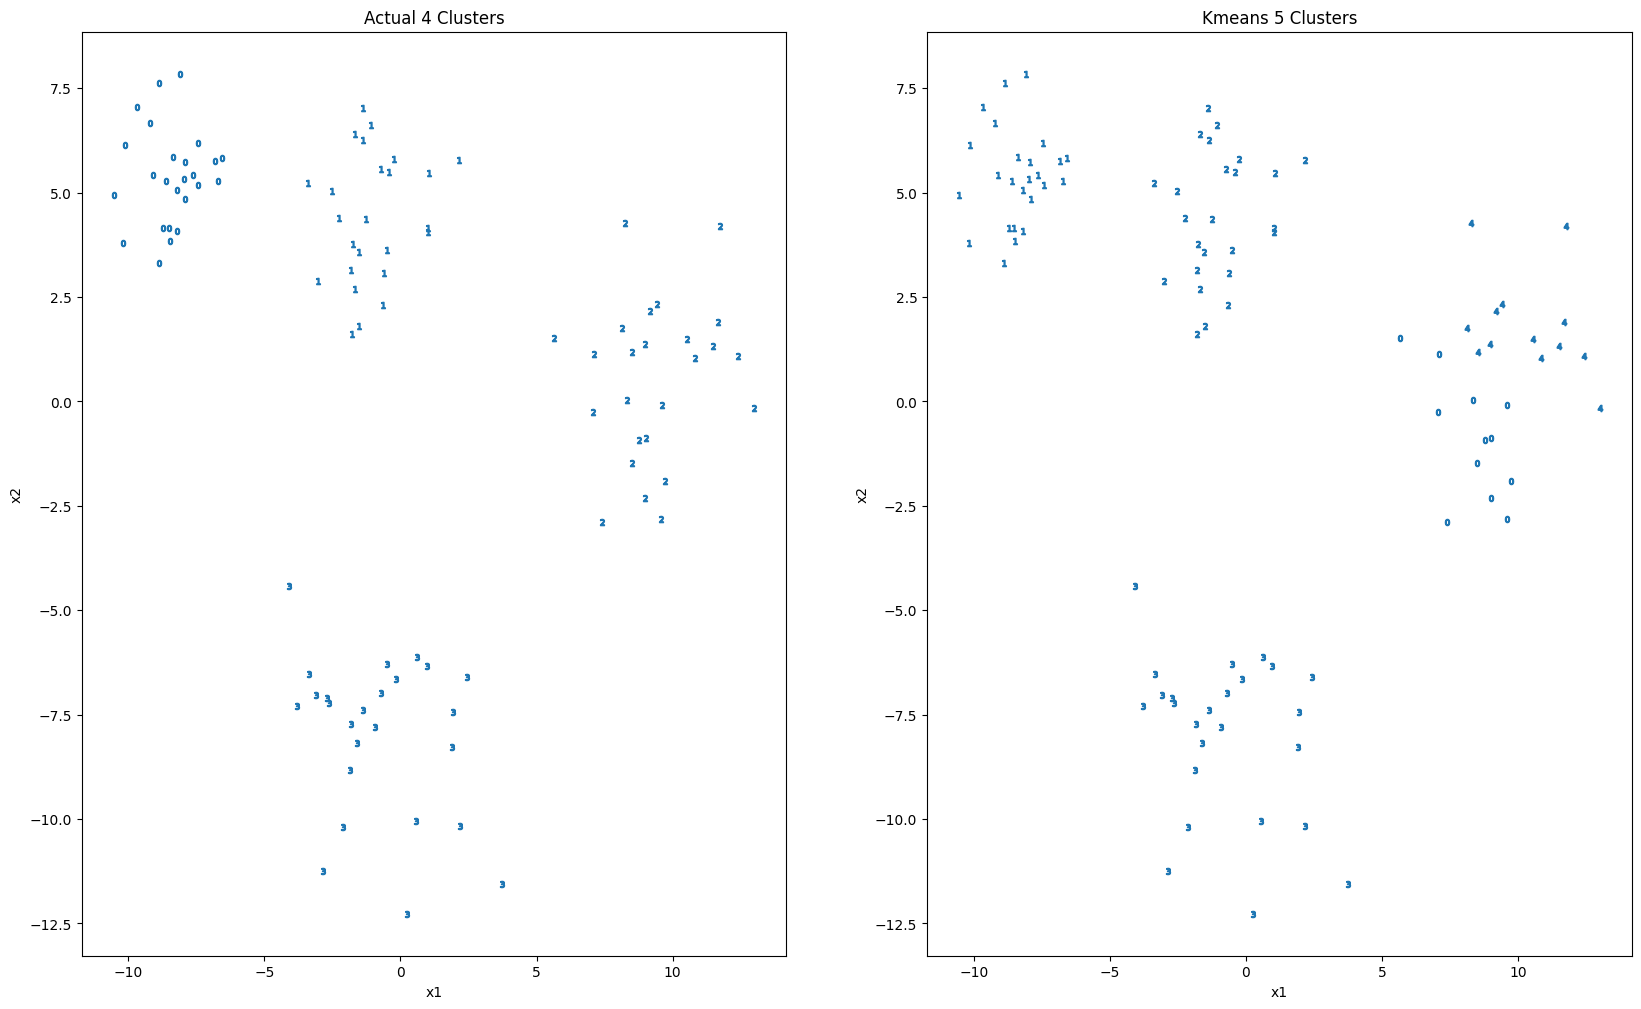

In [12]:
fig, axs = plt.subplots(1,2,figsize=(20,12))

plot_2d_clusters(x,y,axs[0])
plot_2d_clusters(x,y_pred,axs[1])

axs[0].set_title(f"Actual {axs[0].get_title()}")
axs[1].set_title(f"Kmeans {axs[1].get_title()}")